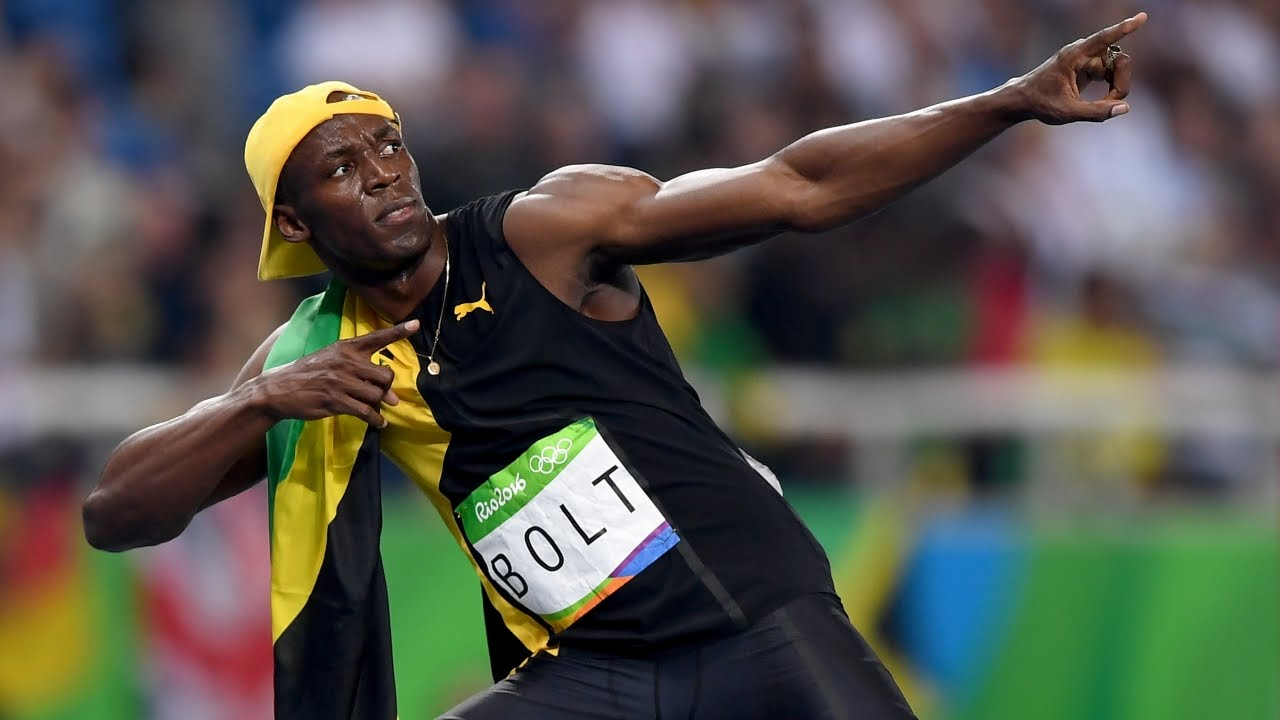

# 2021 Olympics in Tokyo, a little bit of a different Analysis

Hey everyone, this is gonna be my first Kaggle Notebook i have ever uploaded. Iam super new to DataScience and only recenly started to learn Pandas and plotting. Feedback would be awesome to see on what things i can improve on, thanks a lot!

Big sorry for bad formating, i have done this on colab so everything is a little off. I will try fix it when i got more time.

### My Idea:

From what i have seen so far most of you focused on visualizing the raw data of the results, so i tried a little bit something different and tought about some things.

- When you put the number of athletes per country in relations to the medals won, which country is the strongest? How big are the differences compared to the standard results? 
- The USA did send the most athletes (615) to Tokyo, how do they compare to smaller nations such as kenya who only send a much smaller number of athletes (78) 
there?

lets find out!

Thanks to [Berkay Alan](https://www.kaggle.com/berkayalan) and
[Arjun Prasad Sarkhel](https://www.kaggle.com/arjunprasadsarkhel) who provided this beginner friendly Dataset, this was perfect for me :)

**Importing what is needed and reading the data**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

!pip install openpyxl   

import warnings
warnings.filterwarnings('ignore')

In [ ]:
med = pd.read_excel('../input/2021-olympics-in-tokyo/Medals.xlsx', index_col = 0)
ath = pd.read_excel('../input/2021-olympics-in-tokyo/Athletes.xlsx', index_col = 0)

# Exploring the data

In [ ]:
med.head()

In [ ]:
med.shape

In [ ]:
med.isnull().sum()

In [ ]:
med.describe()

In [ ]:
ath.head()

In [ ]:
ath.shape

In [ ]:
ath.isnull().sum()

In [ ]:
ath.describe()

# Using only the Nations that won at least 10 Medals overall / Creating new features and Visuals

**Just making sure the dataset stays somewhat managable. Not doing more than 25 Nations here**

In [ ]:
# Slicing the Dataset into the top 25 Nations 
top25 = med[(med["Total"] >= 10)]

In [ ]:
# Using the athlete excel to get the number of athletes representing each country. Iam sure there
# are better ways to do this. Please let me know what other ways there are, this would be super helpful.

athlete_count = pd.DataFrame(ath["NOC"].value_counts())
athlete_count.rename(columns = {"NOC" : "Athletes"}, inplace=True)
athlete_count.index.name = "Team/NOC"
athlete_count.reset_index(inplace=True)
athlete_count.head()

In [ ]:
# Merging the two dataframes into one and changing the long names

top25 = pd.merge(top25, athlete_count, on="Team/NOC")
top25.loc[0, 'Team/NOC'] = 'USA'
top25.loc[1, 'Team/NOC'] = 'China'
top25.loc[4, 'Team/NOC'] = 'Russia'
top25.head()

In [ ]:
top25.sort_values(by=["Athletes"],inplace=True)

plt.figure(figsize=(16,12))

y_pos = np.arange(len(top25))

plt.barh(y_pos, top25["Athletes"])
plt.yticks(y_pos, top25["Team/NOC"])

plt.title("Athletes per Nation", size=20)
plt.xlabel("Athletes", size = 15)
plt.ylabel("Nations", size = 15)

plt.show()

top25.sort_index(inplace=True)

- Quite a huge difference in how many athletes compete at the games. You have huge Nations such USA, Japan and Australia with more than 550 athletes and small ones such as Cuba, Kenya and Chinese Taipei which all have less than 100.

In [ ]:
# Ignore this please, might use it later for some more plotting
top25.sort_values(by=["Athletes"],ascending=False, inplace=True)
usa_jp_aus_cn_ger = top25["Athletes"][0:5].sum()
rest = top25["Athletes"][5:25].sum()
rest + usa_jp_aus_cn_ger

In [ ]:
# Here iam putting the amount of athletes per nation into relation with what medals they have won.
# If the fair gold ratio is 5.0 it would mean that 5% of the athlete of that nation won gold.

top25["fair_gold_ratio"] = (top25["Gold"]/top25["Athletes"]) * 100
top25["fair_silver_ratio"] = (top25["Silver"]/top25["Athletes"]) * 100
top25["fair_bronze_ratio"] = (top25["Bronze"]/top25["Athletes"]) * 100
top25["fair_total_ratio"] = (top25["Total"]/top25["Athletes"]) * 100
top25.sort_values(by=["Rank by Total"], inplace=True)
top25.head()

In [ ]:
top25.describe()

In [ ]:
top25.sort_values(by=["fair_gold_ratio"],ascending=False, inplace=True)

plt.figure(figsize=(50,15), dpi=100)

  
N = len(top25)
ind = np.arange(N) 
width = 0.25

xvals = top25["fair_gold_ratio"]
bar1 = plt.bar(ind, xvals, width, color = "gold")
  
yvals = top25["fair_silver_ratio"]
bar2 = plt.bar(ind+width, yvals, width, color="silver")
  
zvals = top25["fair_bronze_ratio"]
bar3 = plt.bar(ind+width*2, zvals, width, color = "lightsalmon")
  
plt.xlabel("Nations", size = 15)
plt.ylabel('Medal Ratio', size = 15)
plt.title("Fair Nation Ranking", size = 25)
  
plt.xticks(ind+width,top25["Team/NOC"])
plt.legend( (bar1, bar2, bar3), ("Fair Gold Ratio", "Fair Gold Ratio", "Fair Bronze Ratio"))

plt.show()

Some interesting findings ...
- Cuba seemed to have by far the best results if you put their small number of athletes into relation with their results. They came with 69 Athletes and they have won 7 times gold. Which means 10.1% of their athletes won a gold medal, which makes them the #1 in my Fair Ranking.
- In the Official ranking USA is 1 Gold Medal ahead of China, in my Fair Ranking there is a 3% difference between them, which is quite significant.
- Japan who was #3 in the official Rankings falls down to #7 in the Fair Ranking. Not that big of a surprise due to their high amount of Athletes in the Tokyo games.

In [ ]:
top25.sort_values(by=["fair_total_ratio"],inplace=True)

plt.figure(figsize=(20,10), dpi=100)
data = top25["fair_total_ratio"]
plt.barh(top25["Team/NOC"], data)

plt.grid(color="red", linestyle="--", linewidth=3, axis='x', alpha=0.7)

plt.xlabel("Medal to Athlete Ratio", size=15)
plt.ylabel("Nation", size=15)
plt.title("Overall Fair Medal Ranking", size=20)

plt.show()

Some more toughts ...
- Russia, China and Cuba did really well at this olympics. Over 20% of their athletes did win Medals.
- Japan looks even more dissapointing in this Ranking. A little less than 10% of their Athletes have won Medals in Tokyo. It feels like the official ranking is a little bit skewed due to the high amount of athletes some nations did send to the games.

# Final Toughts

- Learned a lot here but still got a long way to go, i need to get better in plotting, this plots took me quite a while ... haha
- Overall i guess those could be some better ways to rate how nations did instead of the offocial ranking, my way might not be the best but it feels a little more fair this way
- Thank you for reading this, was really fun and hope some people enjoyed it :)